In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from gen_geometry import uniform_circ

In [2]:
def visualize_2d_vector_field(data, vectors, target, data_manifold, scale=1):
    """
    Visualizes a 2D vector field without displaying axes and adds a target point and manifold data points.
    """
    plt.figure(figsize=(8, 8))
    X, Y = data[:, 0], data[:, 1]
    U, V = vectors[:, 0], vectors[:, 1]
    
    # Plot the vector field with a softer, more eye-pleasing color (light blue)
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=scale, color='#32e895', alpha=0.7)
    
    # Plot the target point (in a bright, contrasting color - orange)
    plt.scatter(target[0], target[1], color='#FF6347', s=150, zorder=5, label='Target Point', edgecolors='black', linewidth=1.5)
    
    # Plot the manifold data points (in a light gray color for less distraction)
    plt.scatter(data_manifold[:, 0], data_manifold[:, 1], color='#29bdfe', s=15, zorder=5, label='Manifold Points')
    
    # Set limits and aspect to ensure all points fit well
    plt.xlim([X.min(), X.max()])
    plt.ylim([Y.min(), Y.max()])
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Remove axes and grid for a clean plot
    plt.axis('off')  # Hide the axes
    plt.grid(False)  # Disable the grid
    
    # Display the legend to explain each plot element
    plt.legend(loc='upper right')
    
    # Show the plot
    plt.show()

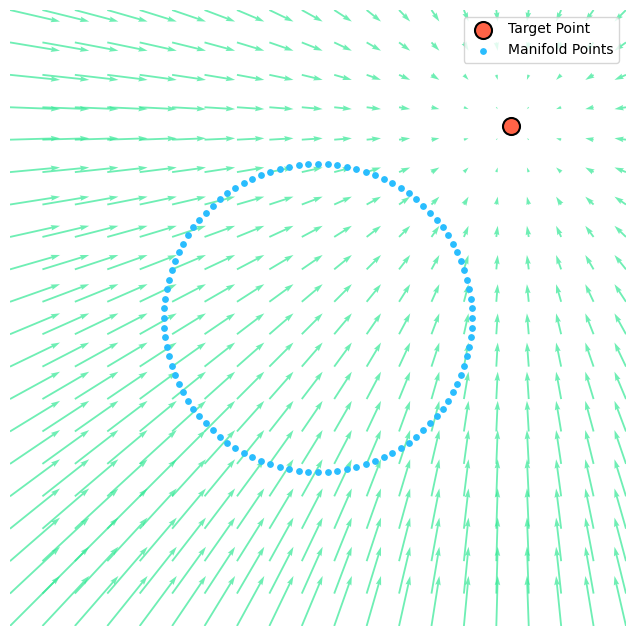

In [3]:

x = np.linspace(-4, 4, 20)
y = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(x, y)
points = np.column_stack((X.ravel(), Y.ravel())) 
target = np.array([2.5,2.5])

vectors = target - points
data_manifold = 2*uniform_circ(100)

# Visualize the vector field
visualize_2d_vector_field(points, vectors, target, data_manifold, scale=10)

/tmp/ipykernel_66095/789561442.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  dir =  projected - elt


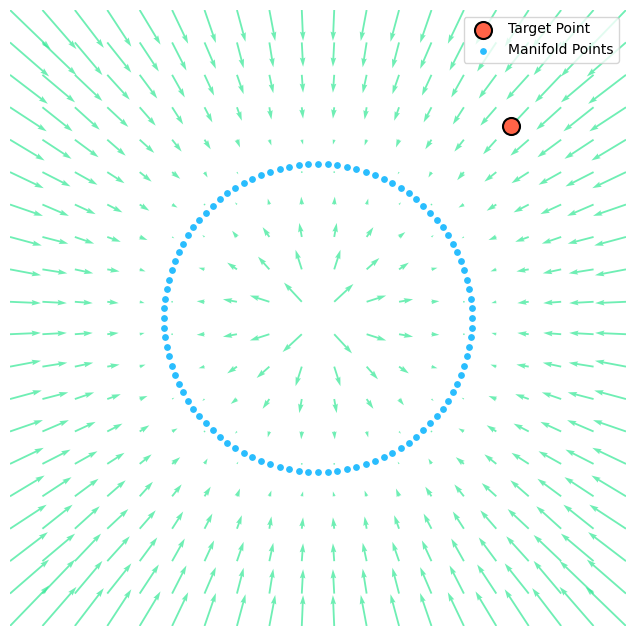

In [13]:
from manifold_project_loss import ManifoldProjection

manifold = ManifoldProjection(data_manifold, k_neighbor=3)
vectors = []
for elt in points:
    projected = manifold.data[manifold.get_proj(elt)]
    dir =  projected - elt
    vectors.append(dir)
    
vectors = np.array(vectors)
visualize_2d_vector_field(points, vectors, target, data_manifold, scale=5)


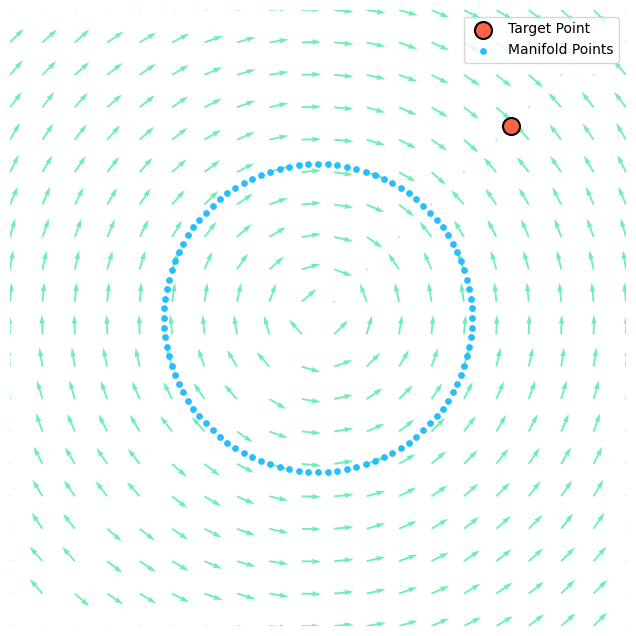

In [18]:
from manifold_project_loss import ManifoldProjection

manifold = ManifoldProjection(data_manifold, k_neighbor=3)
vectors = []
idy = manifold.get_proj(target)
for elt in points:
    idx = manifold.get_proj(elt)
    id_neighbor,_ = manifold.get_geodesic_neighbor(idx,idy)
    dir =  manifold.data[id_neighbor] - manifold.data[idx]
    vectors.append(dir)
    
vectors = np.array(vectors)
visualize_2d_vector_field(points, vectors, target, data_manifold, scale=0.5)


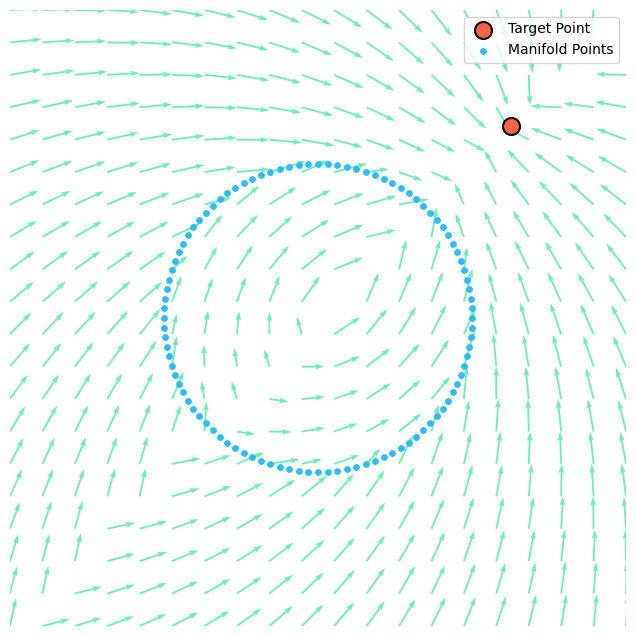

In [31]:
from manifold_project_loss import ManifoldProjection, compute_vector_field

manifold = ManifoldProjection(data_manifold, k_neighbor=3)
vectors = []

idy = manifold.get_proj(target)
y = torch.from_numpy(target)
for elt in points:
    x = torch.from_numpy(elt)
    idx = manifold.get_proj(elt)
    id_neighbor,_ = manifold.get_geodesic_neighbor(idx,idy)
    
    proj_x = manifold.data[idx]
    neighbor_x = manifold.data[id_neighbor]
    dir =  -1 * compute_vector_field(x, y, proj_x, neighbor_x, 0.4,0.2,0.4)
    #dir = (y-x).norm() * dir / dir.norm()
    vectors.append(dir)
    
vectors = np.array(vectors)
visualize_2d_vector_field(points, vectors, target, data_manifold, scale=2)
